## Utils

In [1]:
# execute this cell when you want to free up the memory!
import gc
import pandas as pd
gc.collect()

0

## Step 1: Data Preprocessing

In [4]:
import matplotlib.pyplot as plt
from modules import Annotations, Samples, Sequencing
import glob

samples = Samples.Samples()
samples.load_data(glob.glob('data/*.txt'))

annotations = Annotations.Annotations()
annotations.load_annotations("data/GSE124439_family.xml")

sequencing = Sequencing.Sequencing(samples=samples, annotations=annotations)

Annotations loaded. Action accomplished with 0 errors inside 184 files.


In [5]:
annotations.get_annotations()

,cns subregion,sample group
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND
GSM3533402,Frontal Cortex,ALS Spectrum MND
GSM3533403,Frontal Cortex,ALS Spectrum MND
GSM3533404,Frontal Cortex,ALS Spectrum MND


In [5]:
samples.get_samples()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


## Step 2: Descriptive Analysis

### Sample Description

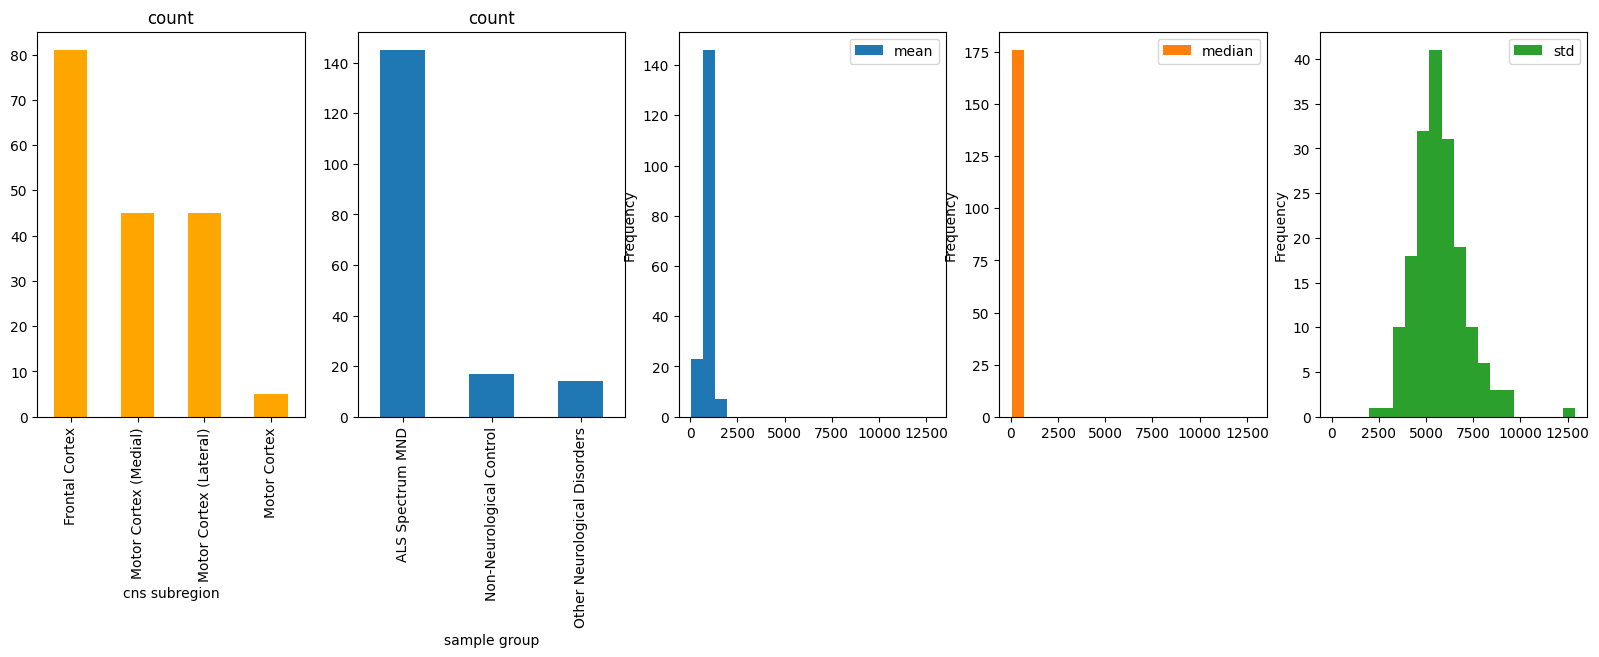

In [9]:
fig, (ax0, ax1, *axes) = plt.subplots(nrows=1,ncols=5, figsize=(20,5))

sample_source = annotations.get_annotations()['cns subregion'].value_counts().plot.bar(ax=ax0, subplots=True, color="orange")
disease_group = annotations.get_annotations()['sample group'].value_counts().plot.bar(ax=ax1, subplots=True)

descriptive_stats_by_samples = samples.get_descriptive_statistics(by_gene=False)
descriptive_stats_by_samples.plot.hist(ax=axes, subplots=True, bins=20)

plt.show()

<Axes: ylabel='Frequency'>

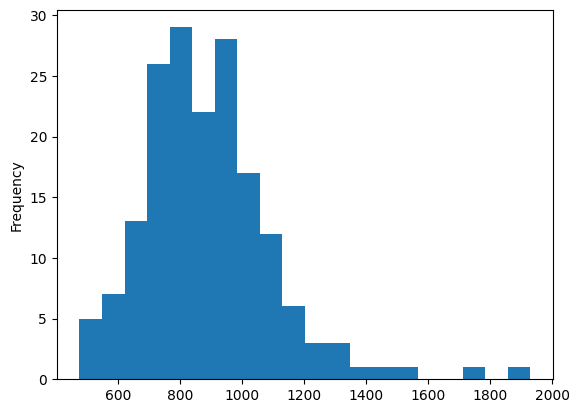

In [3]:
samples.get_samples().mean(axis=1).plot.hist(bins=20)

<Axes: ylabel='Frequency'>

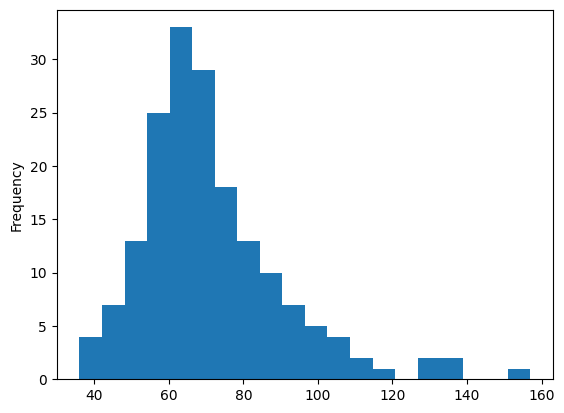

In [16]:
samples.get_samples().median(axis=1).plot.hist(bins=20)

<Axes: ylabel='Frequency'>

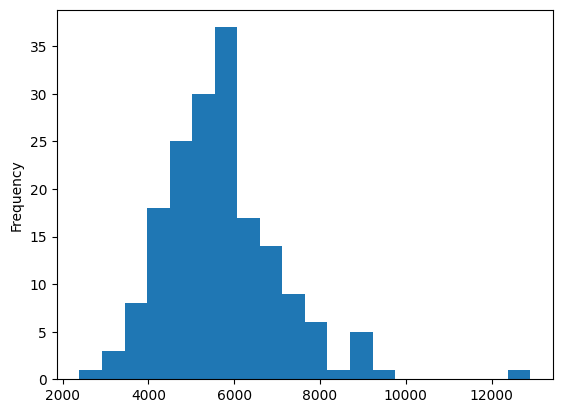

In [14]:
samples.get_samples().std(axis=1).plot.hist(bins=20)

<Axes: >

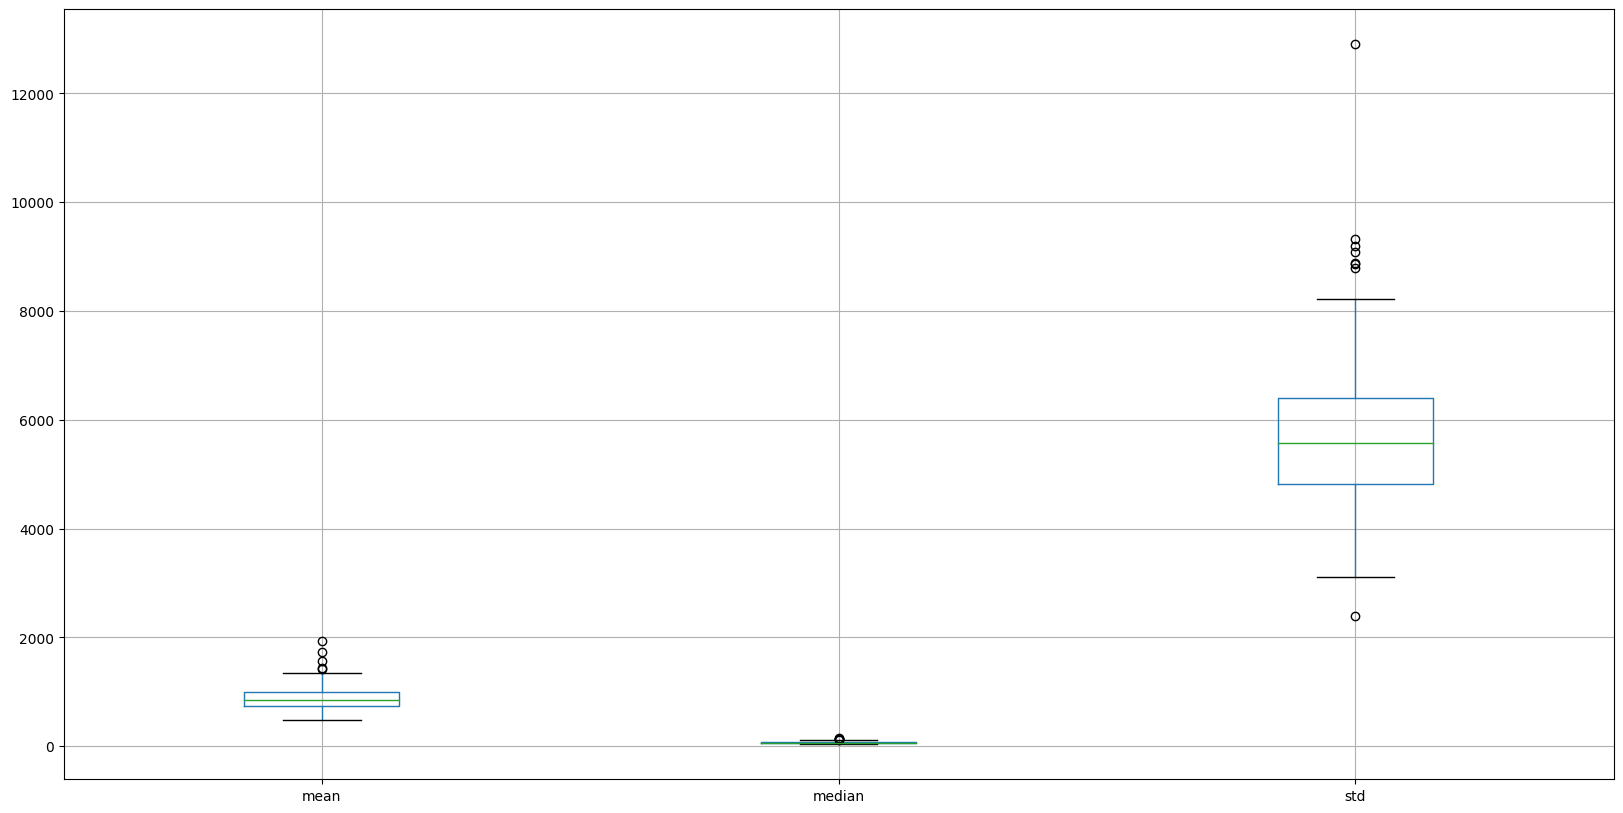

In [3]:
fig = plt.gcf()
fig.set_size_inches(20, 10)

descriptive_stats_by_samples.boxplot()

### RNA Count Description

In [5]:
import numpy as np

<Axes: ylabel='Frequency'>

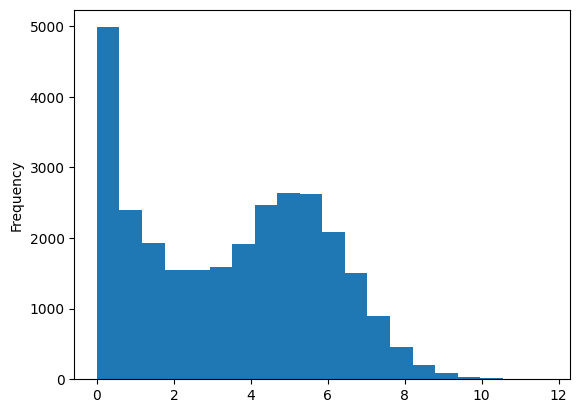

In [8]:
np.log1p(samples.get_samples().std(axis=0)).plot.hist(bins=20)

In [16]:
samples.get_descriptive_statistics().mode()

,mean,median,std
0,0.0,0.0,0.0


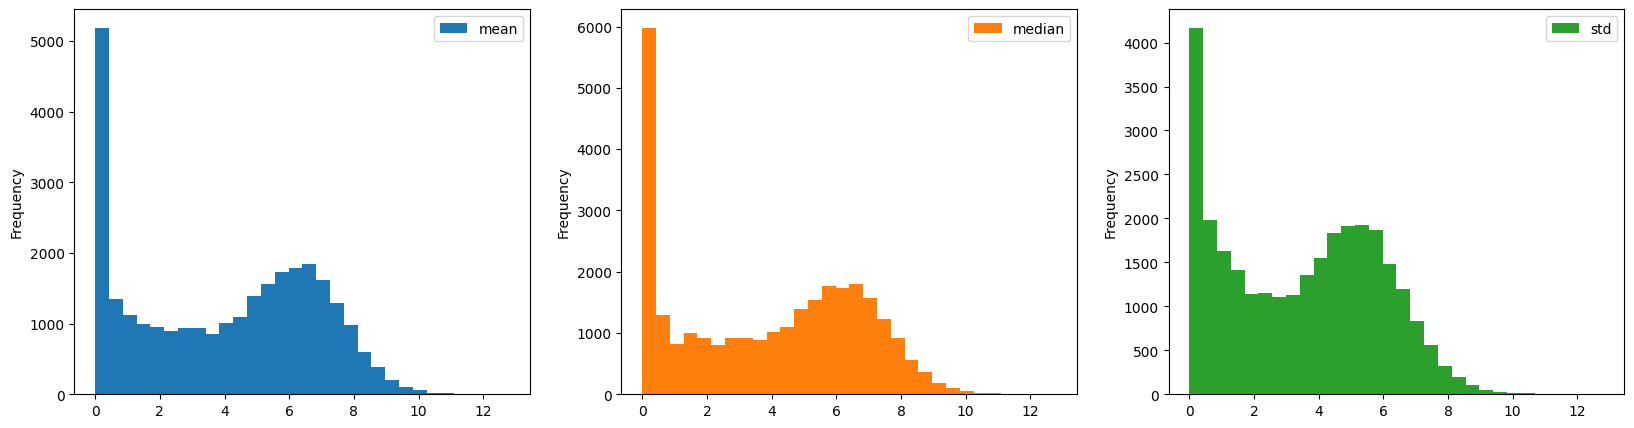

In [35]:
fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,5))

descriptive_stats_by_genes = samples.get_descriptive_statistics(by_gene=True)

descriptive_stats_by_genes.plot.hist(subplots=True, bins=30, ax=axes)

plt.show()

In [4]:
sam = samples.get_basic_statistics()

In [7]:
sam

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.062500,118.568182,0.170455,2455.403409,102.568182,131.272727,2.670455,2.573864,45.119318,0.488636,...,806.892045,1773.965909,1643.812500,901.12500,89.926136,462.647727,110.863636,415.931818,1555.630682,1735.556818
std,20.511225,48.137849,0.662835,1278.351971,35.553998,69.401396,2.448190,2.420200,36.418245,0.770815,...,231.178632,487.710159,435.815209,241.33388,27.999392,129.147228,33.597511,122.379157,462.496696,490.915096
min,10.000000,39.000000,0.000000,439.000000,31.000000,9.000000,0.000000,0.000000,2.000000,0.000000,...,288.000000,640.000000,644.000000,352.00000,30.000000,179.000000,36.000000,136.000000,614.000000,723.000000
25%,24.000000,91.750000,0.000000,1474.500000,79.000000,83.750000,1.000000,1.000000,20.000000,0.000000,...,650.500000,1466.000000,1339.750000,725.50000,71.000000,380.000000,88.000000,328.000000,1247.000000,1418.750000
50%,34.000000,108.500000,0.000000,2286.500000,94.500000,122.000000,2.000000,2.000000,34.500000,0.000000,...,808.000000,1750.000000,1626.000000,869.50000,88.000000,448.000000,107.000000,409.500000,1562.500000,1733.000000
75%,43.250000,140.250000,0.000000,3101.750000,119.500000,162.000000,4.000000,3.250000,60.000000,1.000000,...,918.500000,2018.500000,1868.500000,1034.75000,103.000000,529.500000,131.250000,479.500000,1786.250000,1979.250000
max,134.000000,341.000000,6.000000,7137.000000,227.000000,496.000000,20.000000,14.000000,225.000000,5.000000,...,1824.000000,4240.000000,3761.000000,2046.00000,235.000000,1180.000000,255.000000,954.000000,3946.000000,3902.000000


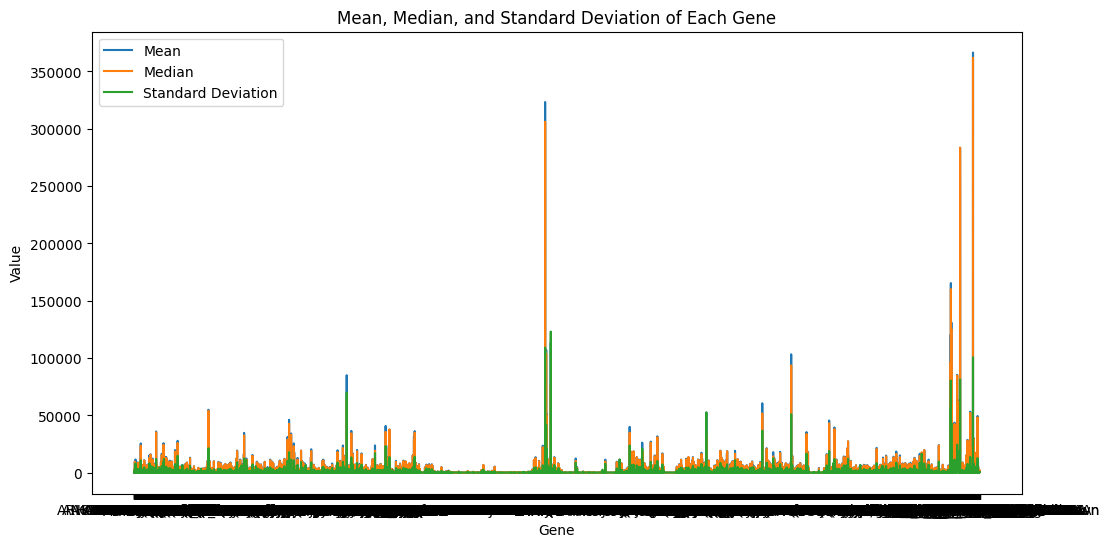

In [32]:
def get_mean_median_std() -> None:
    '''
    This method plots the mean, median and standard deviation of each gene and shows the plot.
    '''
    # mean = self.__genes_counts.mean()
    # median = self.__genes_counts.median()
    # std_dev = self.__genes_counts.std()

    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.plot(samples.get_samples().mean(), label='Mean')
    plt.plot(samples.get_samples().median(), label='Median')
    plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean, Median, and Standard Deviation of Each Gene')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return

get_mean_median_std()

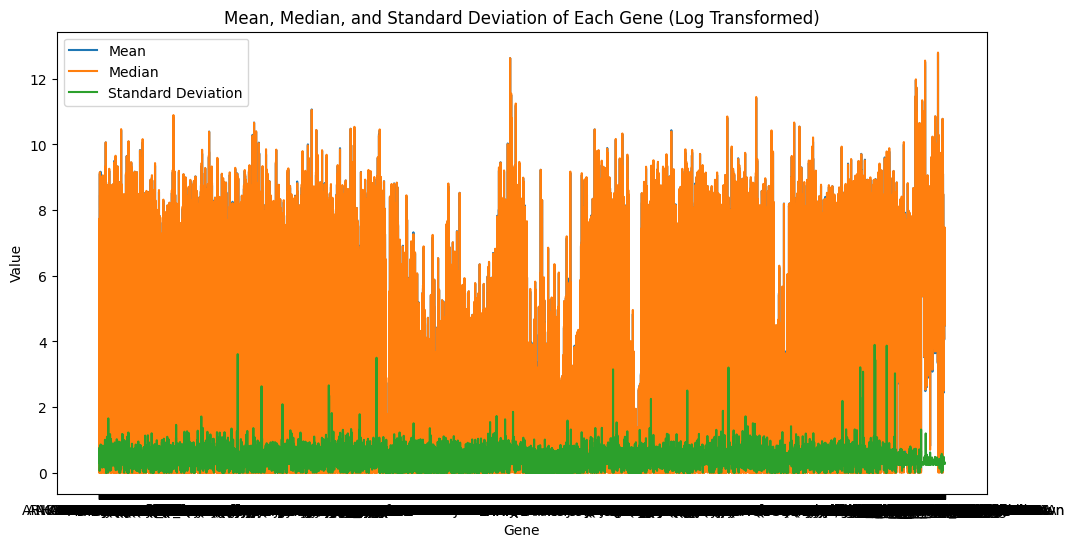

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,3.761200,5.247024,0.0,8.307213,4.532599,5.308268,0.693147,2.197225,4.343805,0.693147,...,6.931472,7.768110,7.667626,7.143618,4.615121,6.410175,4.948760,6.313548,7.727535,7.711549
GSM3533252,3.637586,4.709530,0.0,8.446985,4.634729,4.174387,2.079442,0.693147,4.234107,0.000000,...,6.781058,7.639161,7.554335,6.978214,4.787492,6.171701,4.867534,6.265301,7.507690,7.561122
GSM3533337,3.465736,4.709530,0.0,7.303170,4.442651,4.110874,0.693147,0.693147,2.564949,0.000000,...,6.487684,7.213768,7.204893,6.620073,4.127134,5.834811,4.634729,5.849325,7.023759,7.271009
GSM3533314,2.708050,3.737670,0.0,7.689829,4.663439,5.293305,1.609438,0.000000,3.218876,0.000000,...,6.865891,7.609862,7.505492,6.992096,4.605170,6.269096,4.983607,6.102559,7.328437,7.471932
GSM3533391,3.637586,4.779123,0.0,7.127694,4.653960,5.129899,0.693147,0.693147,3.091042,0.693147,...,6.742881,7.508239,7.393878,6.806829,4.574711,6.159095,4.795791,6.030685,7.350516,7.478170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,3.401197,4.962845,0.0,7.265430,4.634729,4.753590,1.098612,1.609438,2.708050,0.693147,...,6.510258,7.331060,7.185387,6.601230,4.454347,5.978886,4.532599,5.802118,7.154615,7.250636
GSM3533349,3.465736,4.962845,0.0,7.331060,4.691348,4.812184,1.098612,0.693147,4.941642,0.000000,...,6.632002,7.452982,7.362645,6.765039,4.343805,6.059123,4.812184,6.066108,7.299121,7.415175
GSM3533339,3.688879,4.564348,0.0,7.109879,4.317488,4.499810,0.693147,1.386294,3.688879,0.000000,...,6.533789,7.261927,7.201171,6.542472,4.624973,5.872118,4.430817,5.707110,7.044033,7.237778
GSM3533399,3.850148,5.192957,0.0,7.972466,4.499810,4.700480,0.693147,1.945910,3.850148,0.693147,...,6.680855,7.435438,7.305860,6.768493,4.499810,6.152733,4.605170,6.093570,7.429521,7.515889


In [30]:
import numpy as np
import pandas as pd
def log_transformation(df) -> pd.DataFrame:
    # Apply log transformation
    log_genes_counts = np.log1p(df)

    mean = log_genes_counts.mean()
    median = log_genes_counts.median()
    std_dev = log_genes_counts.std()

    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.plot(mean, label='Mean')
    plt.plot(median, label='Median')
    plt.plot(std_dev, label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean, Median, and Standard Deviation of Each Gene (Log Transformed)')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return log_genes_counts

log_transformation(samples.get_samples())

In [4]:
normalized = samples.get_normalized_genes_data()

normalized

# import pandas as pd
# normalized.describe()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,0.192516,1.467302,-0.257893,1.252512,-0.298091,1.007562,-0.684269,2.248416,0.850365,0.665299,...,0.937476,1.211200,1.134872,1.512068,0.360815,1.120923,0.869692,1.106835,1.546832,1.016189
1,-0.051949,-0.178500,-0.257893,1.729482,-0.016026,-0.972094,1.773513,-0.652158,0.630068,-0.635730,...,0.317142,0.623113,0.607921,0.710064,1.041337,0.119213,0.541353,0.893774,0.575413,0.378828
2,-0.345306,-0.178500,-0.257893,-0.762055,-0.523743,-1.029894,-0.684269,-0.652158,-0.912010,-0.635730,...,-0.654570,-0.857385,-0.687597,-0.632149,-1.036046,-0.944618,-0.264571,-0.573066,-0.940262,-0.609899
3,-1.176485,-1.615974,-0.257893,-0.212129,0.068593,0.964212,0.544622,-1.066526,-0.581565,-0.635730,...,0.655506,0.499738,0.398521,0.772396,0.324998,0.499708,1.018937,0.246398,-0.072923,0.043805
4,-0.051949,-0.011837,-0.257893,-0.949548,0.040387,0.530711,-0.684269,-0.652158,-0.664176,0.665299,...,0.173988,0.098770,-0.043289,0.007791,0.217547,0.072622,0.272712,-0.007636,0.000801,0.066276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,-0.443092,0.488154,-0.257893,-0.805202,-0.016026,-0.235142,-0.274639,0.590945,-0.856936,0.665299,...,-0.589500,-0.509879,-0.747425,-0.690326,-0.176439,-0.533063,-0.563061,-0.704180,-0.599831,-0.669141
172,-0.345306,0.488154,-0.257893,-0.729107,0.153212,-0.133991,-0.274639,-0.652158,2.585202,-0.635730,...,-0.212094,-0.102742,-0.158344,-0.145961,-0.498792,-0.276811,0.332410,0.115284,-0.168330,-0.154349
173,0.045837,-0.490995,-0.257893,-0.966807,-0.805808,-0.610843,-0.684269,0.176577,-0.168508,-0.635730,...,-0.520092,-0.719617,-0.699102,-0.864855,0.396632,-0.843671,-0.831702,-0.950019,-0.890390,-0.705912
174,0.388087,1.258973,-0.257893,0.347997,-0.382711,-0.321842,-0.684269,1.419681,0.024251,0.665299,...,-0.047250,-0.164430,-0.358540,-0.133494,-0.033171,0.049327,-0.354118,0.213619,0.278349,0.205188


In [ ]:
mean = samples.get_mean_median_std_dev()

In [4]:
sam

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.00000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,38.062500,118.568182,0.170455,2455.403409,102.568182,131.272727,2.670455,2.573864,45.119318,0.488636,...,806.892045,1773.965909,1643.812500,901.12500,89.926136,462.647727,110.863636,415.931818,1555.630682,1735.556818
std,20.511225,48.137849,0.662835,1278.351971,35.553998,69.401396,2.448190,2.420200,36.418245,0.770815,...,231.178632,487.710159,435.815209,241.33388,27.999392,129.147228,33.597511,122.379157,462.496696,490.915096
min,10.000000,39.000000,0.000000,439.000000,31.000000,9.000000,0.000000,0.000000,2.000000,0.000000,...,288.000000,640.000000,644.000000,352.00000,30.000000,179.000000,36.000000,136.000000,614.000000,723.000000
25%,24.000000,91.750000,0.000000,1474.500000,79.000000,83.750000,1.000000,1.000000,20.000000,0.000000,...,650.500000,1466.000000,1339.750000,725.50000,71.000000,380.000000,88.000000,328.000000,1247.000000,1418.750000
50%,34.000000,108.500000,0.000000,2286.500000,94.500000,122.000000,2.000000,2.000000,34.500000,0.000000,...,808.000000,1750.000000,1626.000000,869.50000,88.000000,448.000000,107.000000,409.500000,1562.500000,1733.000000
75%,43.250000,140.250000,0.000000,3101.750000,119.500000,162.000000,4.000000,3.250000,60.000000,1.000000,...,918.500000,2018.500000,1868.500000,1034.75000,103.000000,529.500000,131.250000,479.500000,1786.250000,1979.250000
max,134.000000,341.000000,6.000000,7137.000000,227.000000,496.000000,20.000000,14.000000,225.000000,5.000000,...,1824.000000,4240.000000,3761.000000,2046.00000,235.000000,1180.000000,255.000000,954.000000,3946.000000,3902.000000


## Step 3: PCA

By reducing the number of samples we can see the relationship between samples. The small number of dimensions show two components with the highest weight.
Plot the results obtained with the new dimensionality reducted data.

In [44]:
reduced_samples

,PC1,PC2
GSM3533382,102.150849,-73.081677
GSM3533252,9.872624,-4.123005
GSM3533337,-10.562617,8.534611
GSM3533314,-86.498471,25.758401
GSM3533391,-45.348866,-42.483218
...,...,...
GSM3533291,37.804882,-47.814623
GSM3533349,-20.826506,-8.182184
GSM3533339,-72.472641,32.991673
GSM3533399,-17.754342,-43.504201


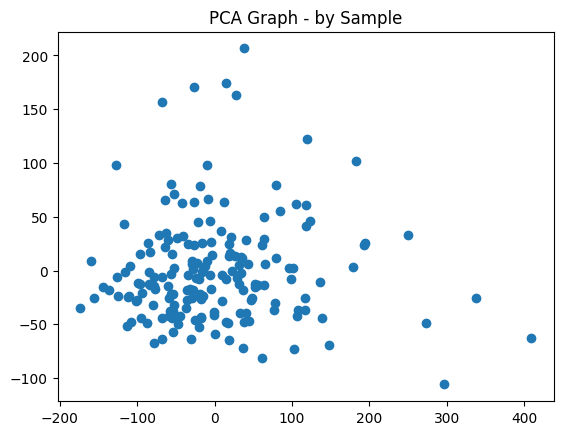

In [43]:
samples.reduce_to_2d_per_sample()

reduced_samples = samples.get_reduced_samples()

plt.scatter(reduced_samples.PC1, reduced_samples.PC2)
plt.title('PCA Graph - by Sample')

plt.show()

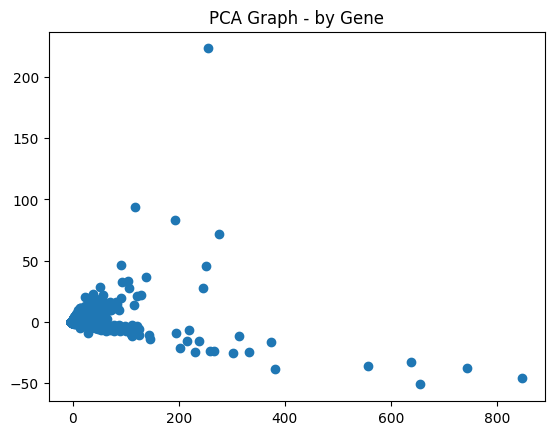

In [40]:
samples.reduce_to_2d_per_gene()

reduced_genes = samples.get_reduced_genes()

plt.scatter(reduced_genes.PC1, reduced_genes.PC2)
plt.title('PCA Graph - by Gene')

plt.show()

## Step 4: tSNE

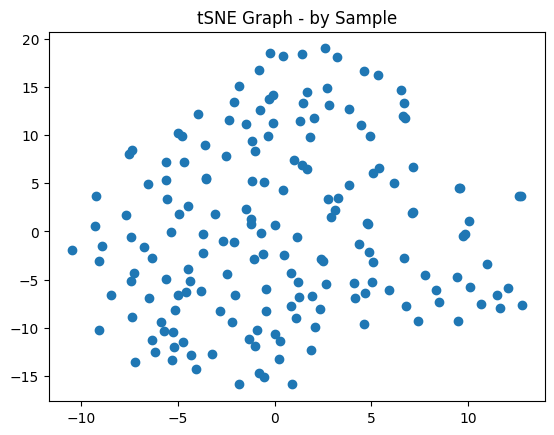

In [2]:
samples.reduce_to_2d_per_sample_tSNE()

reduced_samples = samples.get_reduced_samples_tSNE()

plt.scatter(reduced_samples[0], reduced_samples[1])
plt.title('tSNE Graph - by Sample')

plt.show()

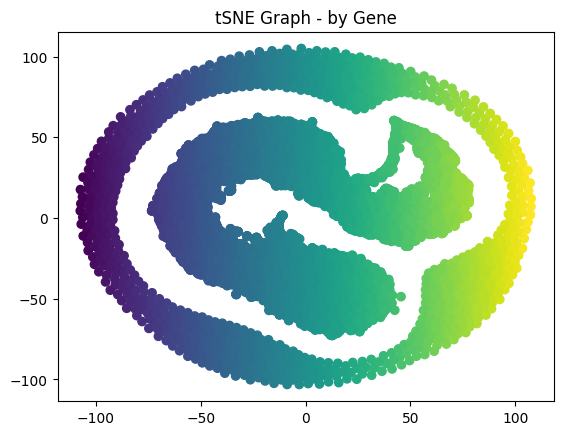

In [9]:
# samples.reduce_to_2d_per_gene_tSNE()

reduced_samples = samples.get_reduced_genes_tSNE()

plt.scatter(reduced_samples[0], reduced_samples[1], c=reduced_samples[0])
plt.title('tSNE Graph - by Gene')

plt.show()

## Step 5: Univariate Analysis

In [6]:
annotations.get_annotations()['sample group'].value_counts()

sample group
ALS Spectrum MND                145
Non-Neurological Control         17
Other Neurological Disorders     14
Name: count, dtype: int64

In [7]:
# als_patients = annotations.get_annotations().drop()
als_patients = annotations.get_annotations()[annotations.get_annotations()["sample group"] == "ALS Spectrum MND"]
als_patients

,cns subregion,sample group
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND
GSM3533402,Frontal Cortex,ALS Spectrum MND
GSM3533403,Frontal Cortex,ALS Spectrum MND
GSM3533404,Frontal Cortex,ALS Spectrum MND


In [8]:
healthy = annotations.get_annotations()[annotations.get_annotations()["sample group"] == "Non-Neurological Control"]
healthy

,cns subregion,sample group
GSM3533238,Frontal Cortex,Non-Neurological Control
GSM3533251,Motor Cortex (Medial),Non-Neurological Control
GSM3533259,Motor Cortex (Lateral),Non-Neurological Control
GSM3533266,Frontal Cortex,Non-Neurological Control
GSM3533272,Motor Cortex (Medial),Non-Neurological Control
GSM3533277,Motor Cortex (Lateral),Non-Neurological Control
GSM3533282,Frontal Cortex,Non-Neurological Control
GSM3533290,Motor Cortex (Medial),Non-Neurological Control
GSM3533366,Motor Cortex (Medial),Non-Neurological Control
GSM3533367,Motor Cortex (Lateral),Non-Neurological Control


In [ ]:
diagnosed = annotations.get_annotations()[annotations.get_annotations()["sample group"] != "Non-Neurological Control"]
diagnosed

In [10]:
diagnosed = diagnosed.merge(samples.get_samples(), left_index=True, right_index=True)
diagnosed 

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533230,Frontal Cortex,ALS Spectrum MND,42,149,0,3327,101,78,4,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,25,107,2,1787,153,109,2,1,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,20,95,0,1830,121,127,1,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,22,101,0,2131,142,143,5,1,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,22,102,0,1706,83,178,1,3,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,23,113,0,2130,72,71,2,3,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,134,300,0,6077,171,42,8,5,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,64,290,0,4752,118,174,8,2,...,623,1466,1246,726,61,358,107,347,1284,1469
GSM3533404,Frontal Cortex,ALS Spectrum MND,124,332,0,3516,141,173,3,2,...,743,1846,1680,936,110,479,120,503,1646,1839


In [11]:
als_patients = als_patients.merge(samples.get_samples(), left_index=True, right_index=True)
als_patients 

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533230,Frontal Cortex,ALS Spectrum MND,42,149,0,3327,101,78,4,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,25,107,2,1787,153,109,2,1,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,20,95,0,1830,121,127,1,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,22,101,0,2131,142,143,5,1,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,22,102,0,1706,83,178,1,3,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,23,113,0,2130,72,71,2,3,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,134,300,0,6077,171,42,8,5,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,64,290,0,4752,118,174,8,2,...,623,1466,1246,726,61,358,107,347,1284,1469
GSM3533404,Frontal Cortex,ALS Spectrum MND,124,332,0,3516,141,173,3,2,...,743,1846,1680,936,110,479,120,503,1646,1839


In [12]:
healthy = healthy.merge(samples.get_samples(), left_index=True, right_index=True)
healthy

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533238,Frontal Cortex,Non-Neurological Control,34,84,0,677,45,95,1,1,...,651,1317,1188,687,63,313,54,321,1330,1545
GSM3533251,Motor Cortex (Medial),Non-Neurological Control,109,154,0,2560,136,117,4,4,...,557,1437,1284,834,80,319,88,315,1032,1164
GSM3533259,Motor Cortex (Lateral),Non-Neurological Control,63,128,0,1984,76,76,2,1,...,623,1599,1448,838,57,416,78,395,1532,1604
GSM3533266,Frontal Cortex,Non-Neurological Control,37,124,0,2452,75,122,3,5,...,884,1956,1829,954,90,493,121,431,1645,1992
GSM3533272,Motor Cortex (Medial),Non-Neurological Control,74,161,0,3094,112,154,8,4,...,889,1950,2048,979,125,543,146,390,1806,1977
GSM3533277,Motor Cortex (Lateral),Non-Neurological Control,37,95,0,2847,98,164,8,6,...,873,1785,1823,887,112,545,117,377,1569,1769
GSM3533282,Frontal Cortex,Non-Neurological Control,33,140,0,2978,119,132,0,6,...,940,2077,1986,1037,102,527,144,459,1910,2065
GSM3533290,Motor Cortex (Medial),Non-Neurological Control,16,107,0,3994,88,186,2,2,...,757,1751,1444,859,74,403,101,395,1436,1606
GSM3533366,Motor Cortex (Medial),Non-Neurological Control,20,90,0,2400,90,127,1,2,...,964,2036,1853,1023,121,589,136,557,1878,2211
GSM3533367,Motor Cortex (Lateral),Non-Neurological Control,41,145,0,4651,183,205,0,4,...,1320,3122,2731,1426,125,803,184,685,2671,2619


In [117]:
def compare_two_groups(group1, group2, label_1, label_2) -> None:
    '''
    This method plots the mean, median and standard deviation of each gene and shows the plot.
    '''
    mean_group1 = group1.drop(columns=['cns subregion', 'sample group']).mean()
    mean_group2 = group2.drop(columns=['cns subregion', 'sample group']).mean()
    # mean = self.__genes_counts.mean()
    # median = self.__genes_counts.median()
    # std_dev = self.__genes_counts.std()

    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.plot(mean_group1, label=label_1)
    plt.plot(mean_group2, label=label_2)



    # plt.plot(samples.get_samples().median(), label='Median')
    # plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean')
    plt.xlabel('Gene')
    plt.ylabel('Value')

    plt.show()
    return

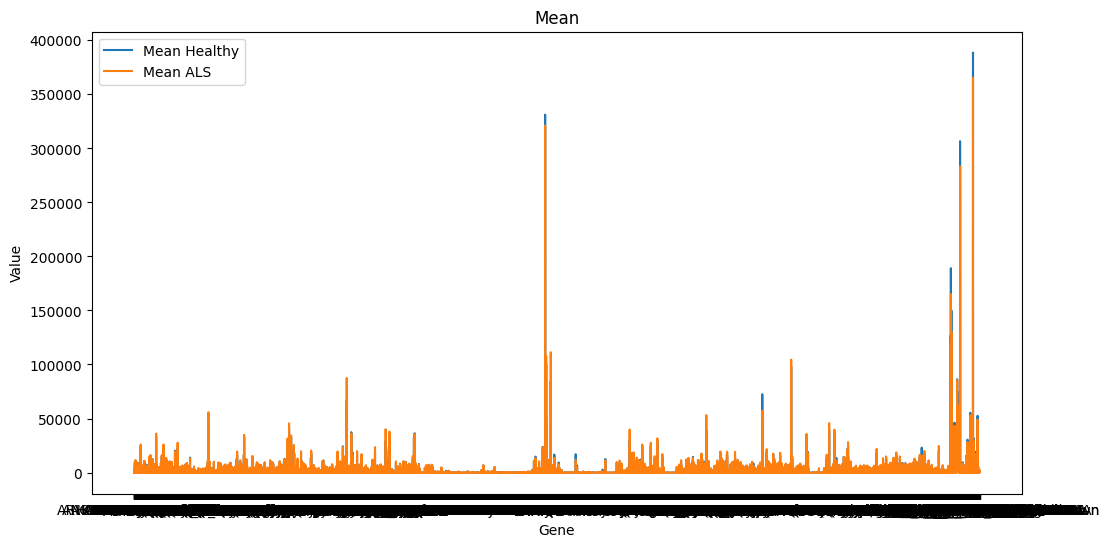

In [121]:
compare_two_groups(healthy, als_patients, "Mean Healthy", "Mean ALS")

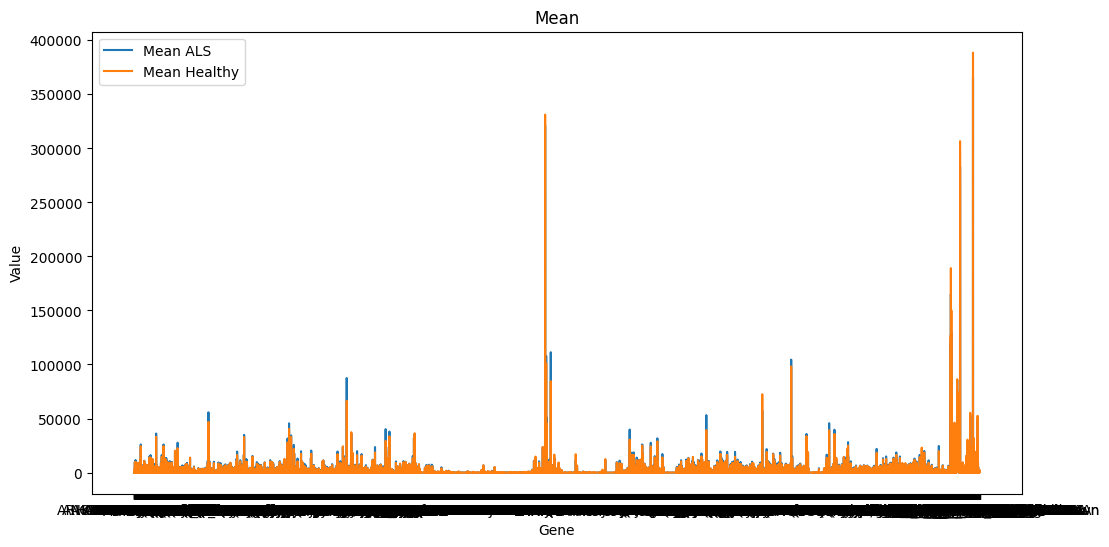

In [124]:
compare_two_groups(als_patients, healthy, "Mean ALS", "Mean Healthy")

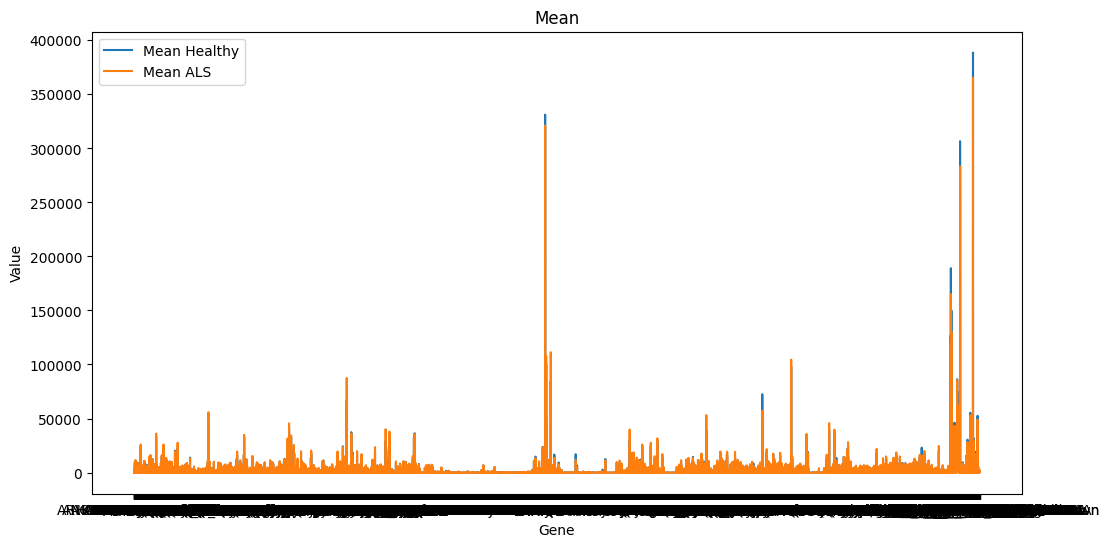

Top 100 genes where Mean Healthy is larger than Mean ALS :
 AluJb:Alu:SINE          24114.808925
L2a:L2:LINE             23486.050304
MIRb:MIR:SINE           23374.107505
AluSx:Alu:SINE          19713.770791
AluSx1:Alu:SINE         18132.374848
                            ...     
SST1:centr:Satellite     1086.689655
L1MB4:L1:LINE            1085.325761
MLT1K:ERVL-MaLR:LTR      1083.422718
L1MEc:L1:LINE            1076.267343
RNR1                     1073.108722
Length: 100, dtype: float64

Top 100 genes where Mean Healthy is smaller than Mean ALS :
 MBP        -26777.012982
GFAP       -21011.053955
PLP1       -13828.057201
HSP90AA1   -10827.988641
MTURN       -9249.152535
                ...     
PLEKHB1     -1631.081947
SYT11       -1624.244625
TAOK1       -1624.213793
APC         -1610.517647
ANLN        -1594.848682
Length: 100, dtype: float64


In [134]:
def compare_two_groups_top(group1, group2, label_1, label_2) -> None:
    '''
    This method plots the mean of each gene for two groups and shows the plot.
    '''
    # Compute the mean expression for each group
    mean_group1 = group1.drop(columns=['cns subregion', 'sample group']).mean()
    mean_group2 = group2.drop(columns=['cns subregion', 'sample group']).mean()

    # Compute the difference in mean expression between the two groups
    mean_diff = mean_group1 - mean_group2

    # Get the top 10 genes where group1 is larger than group2
    top_10_greater = mean_diff.nlargest(100)

    # Get the top 10 genes where group1 is smaller than group2
    top_10_smaller = mean_diff.nsmallest(100)

    # Plot mean expression for each group
    plt.figure(figsize=(12, 6))
    plt.plot(mean_group1, label=label_1)
    plt.plot(mean_group2, label=label_2)
    plt.legend(loc='best')
    plt.title('Mean')
    plt.xlabel('Gene')
    plt.ylabel('Value')
    plt.show()

    # Print top 10 genes where group1 is larger than group2
    print("Top 100 genes where", label_1, "is larger than", label_2, ":\n", top_10_greater)

    # Print top 10 genes where group1 is smaller than group2
    print("\nTop 100 genes where", label_1, "is smaller than", label_2, ":\n", top_10_smaller)

    return

compare_two_groups_top(healthy, als_patients, "Mean Healthy", "Mean ALS")

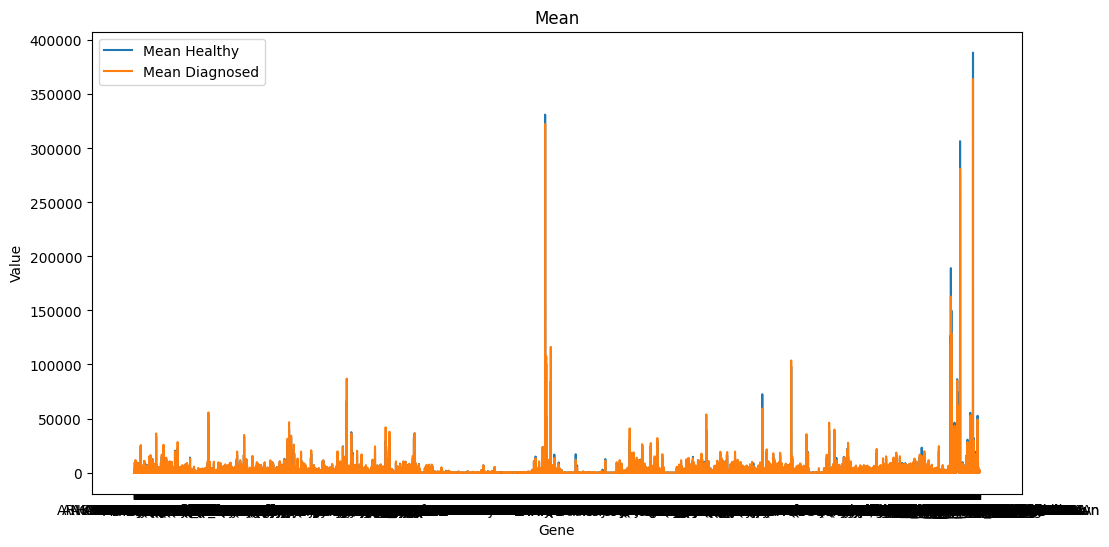

In [131]:
compare_two_groups(healthy, diagnosed, "Mean Healthy", "Mean Diagnosed")

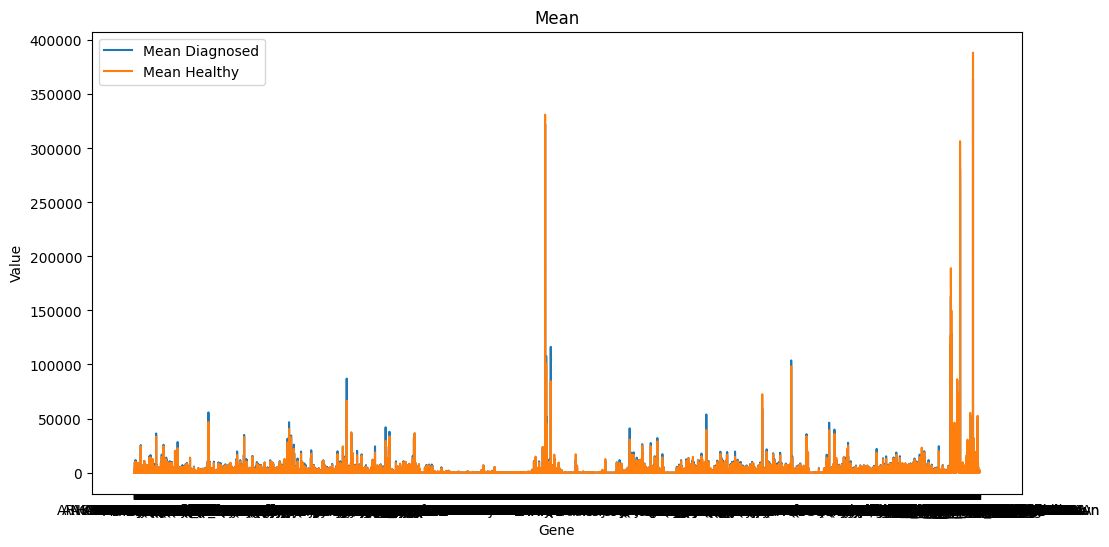

In [132]:
compare_two_groups(diagnosed, healthy, "Mean Diagnosed","Mean Healthy")

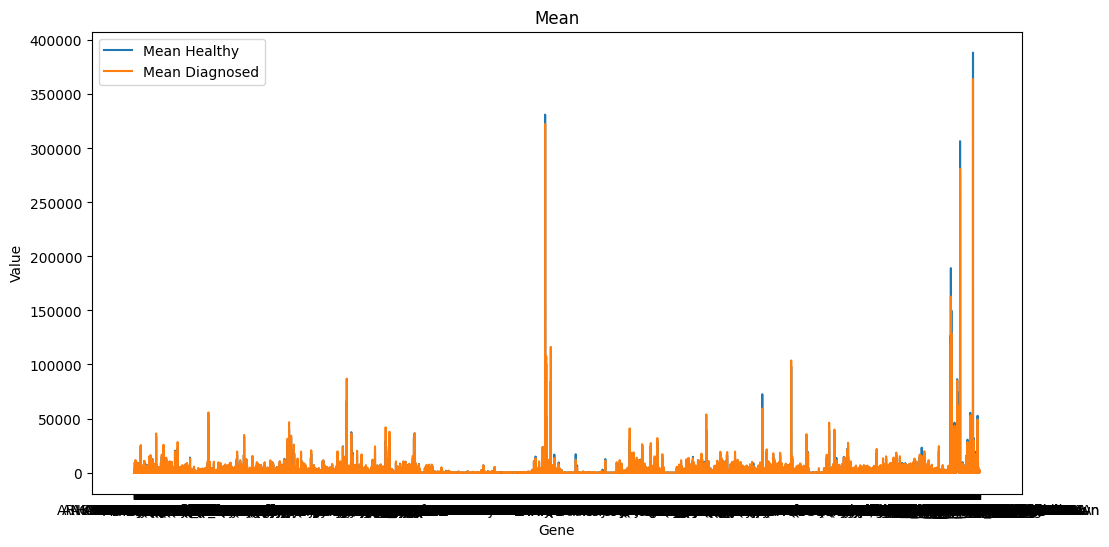

Top 10 genes where Mean Healthy is larger than Mean Diagnosed :
 AluJb:Alu:SINE     26343.569367
L2a:L2:LINE        25545.770625
MIRb:MIR:SINE      24458.440622
AluSx:Alu:SINE     21097.026267
AluSx1:Alu:SINE    19365.762486
L2c:L2:LINE        18350.843137
AluSz:Alu:SINE     18167.692934
MIR:MIR:SINE       15957.690344
AluJr:Alu:SINE     15517.585646
L2b:L2:LINE        15474.443581
dtype: float64

Top 10 genes where Mean Healthy is smaller than Mean Diagnosed :
 MBP        -31749.343322
GFAP       -20485.697373
PLP1       -14442.814650
HSP90AA1   -12534.259341
MTURN      -10383.618942
CALM1       -8754.520163
MAP1B       -7051.042175
SPARCL1     -6982.376989
AQP4        -6917.038846
MAP2        -6266.960044
dtype: float64


In [133]:
compare_two_groups_top(healthy, diagnosed, "Mean Healthy", "Mean Diagnosed")

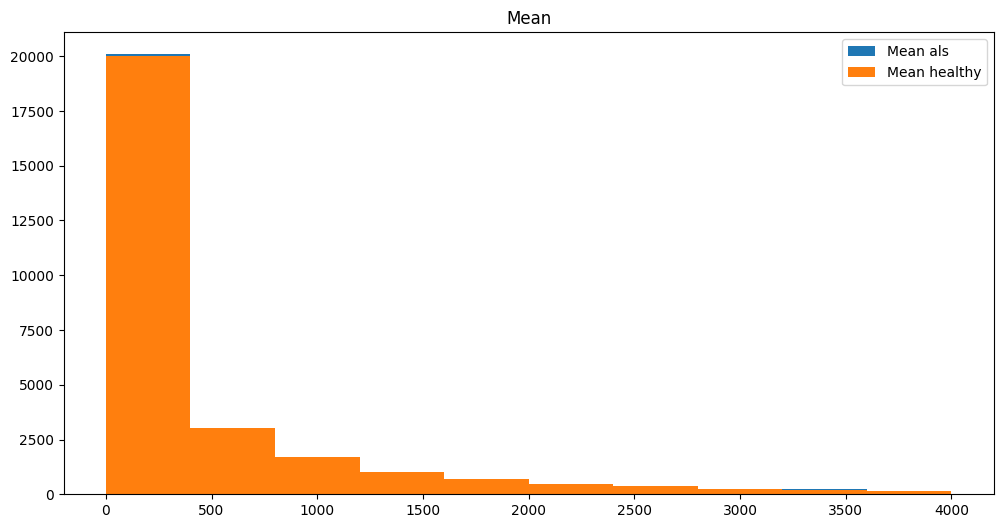

In [79]:
def compare_healthy_als_hist(healty_patients, als_patients) -> None:
    bins = 10
    mean_healthy = healty_patients.drop(columns=['cns subregion', 'sample group']).mean()
    mean_als = als_patients.drop(columns=['cns subregion', 'sample group']).mean()


    # Plot mean, median, and standard deviation
    plt.figure(figsize=(12, 6))

    plt.hist(mean_als, bins=bins, label='Mean als', range=(0, 4000))
    plt.hist(mean_healthy, bins= bins, label='Mean healthy', range=(0, 4000))



    # plt.plot(samples.get_samples().median(), label='Median')
    # plt.plot(samples.get_samples().std(), label='Standard Deviation')

    plt.legend(loc='best')
    plt.title('Mean')
    # plt.xlabel('Gene')
    # plt.ylabel('Value')

    plt.show()
    return

compare_healthy_als_hist(healthy, als_patients )

In [ ]:
group1_data = healthy.drop(columns=['cns subregion', 'sample group'])
group2_data = als_patients.drop(columns=['cns subregion', 'sample group'])


In [24]:
len(group1_data.columns)

28953

In [34]:
gene_expression_columns = group1_data.columns[]

# Replace 0 values with a small non-zero value
group1_data[gene_expression_columns] = group1_data[gene_expression_columns].replace(0, 1e-6)  # Adjust the value as needed


SyntaxError: invalid syntax (1001955214.py, line 1)

In [35]:
samples.get_samples()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533382,42,189,0,4052,92,201,1,8,76,1,...,1023,2363,2137,1265,100,607,140,551,2269,2233
GSM3533252,37,110,0,4660,102,64,7,1,68,0,...,880,2077,1908,1072,119,478,129,525,1821,1921
GSM3533337,31,110,0,1484,84,60,1,1,12,0,...,656,1357,1345,749,61,341,102,346,1122,1437
GSM3533314,14,41,0,2185,105,198,4,0,24,0,...,958,2017,1817,1087,99,527,145,446,1522,1757
GSM3533391,37,118,0,1245,104,168,1,1,21,1,...,847,1822,1625,903,96,472,120,415,1556,1768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533291,29,142,0,1429,102,115,2,4,14,1,...,671,1526,1319,735,85,394,92,330,1279,1408
GSM3533349,31,142,0,1526,108,122,2,1,139,0,...,758,1724,1575,866,76,427,122,430,1478,1660
GSM3533339,39,95,0,1223,74,89,1,3,39,0,...,687,1424,1340,693,101,354,83,300,1145,1390
GSM3533399,46,179,0,2899,89,109,1,6,46,1,...,796,1694,1488,869,89,469,99,442,1684,1836


In [36]:
annotations.get_annotations()

,cns subregion,sample group
GSM3533230,Frontal Cortex,ALS Spectrum MND
GSM3533231,Frontal Cortex,ALS Spectrum MND
GSM3533232,Frontal Cortex,ALS Spectrum MND
GSM3533233,Frontal Cortex,ALS Spectrum MND
GSM3533234,Frontal Cortex,ALS Spectrum MND
...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND
GSM3533402,Frontal Cortex,ALS Spectrum MND
GSM3533403,Frontal Cortex,ALS Spectrum MND
GSM3533404,Frontal Cortex,ALS Spectrum MND


In [39]:
import pandas as pd
import numpy as np
from pydeseq2.dds import DeseqDataSet
from pydeseq2.default_inference import DefaultInference
from pydeseq2.ds import DeseqStats

# Load gene expression data (count matrix)
samples_df = samples.get_samples()

# Load metadata
annotations_df = annotations.get_annotations()

# Filter samples to align with metadata
samples_df = samples_df.loc[annotations_df.index]

# Create a DeseqDataSet object
inference = DefaultInference(n_cpus=8)
dds = DeseqDataSet(
    counts=samples_df,
    metadata=annotations_df,
    design_factors=["sample group"],  # You can add more design factors here
    refit_cooks=True,
    inference=inference,
)

# Run DESeq2 analysis
dds.deseq2()

# Perform statistical analysis
stat_res = DeseqStats(dds, inference=inference)
stat_res.summary()

# Optionally, perform LFC shrinkage
stat_res.lfc_shrink()

# Save results if needed
stat_res.summary().to_csv("differential_expression_results.csv")


Fitting size factors...
... done in 0.16 seconds.

Fitting dispersions...
... done in 87.36 seconds.

Fitting dispersion trend curve...
... done in 0.84 seconds.

Fitting MAP dispersions...
... done in 87.65 seconds.

Fitting LFCs...
... done in 7.08 seconds.

Replacing 221 outlier genes.

Fitting dispersions...
... done in 0.70 seconds.

Fitting MAP dispersions...
... done in 0.62 seconds.

Fitting LFCs...
... done in 0.12 seconds.

Running Wald tests...
... done in 4.85 seconds.



Log2 fold change & Wald test p-value: sample group Non-Neurological Control vs ALS Spectrum MND
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993900        0.018129  0.142560  0.127165   
A1BG-AS1                 113.742744        0.052955  0.099424  0.532623   
A1CF                       0.155759       -0.590128  1.728791 -0.341353   
A2M                     2345.384521        0.119104  0.159530  0.746589   
A2M-AS1                   99.268402       -0.186468  0.097540 -1.911716   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.854980        0.058600  0.103594  0.565669   
X9_LINE:L1:LINE          109.576019       -0.073868  0.110992 -0.665525   
Zaphod2:hAT-Tip100:DNA   411.010284        0.065308  0.105880  0.616807   
Zaphod3:hAT-Tip100:DNA  1539.491089        0.107348  0.107347  1.000003   
Zaphod:hAT-Tip100:DNA   1710.104370        0.084252  0.096951  0.869016   

   

Fitting MAP LFCs...
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/pydeseq2/utils.py:1249: RuntimeWarning: overflow encountered in exp
  counts - (counts + size) / (1 + size * np.exp(-xbeta - offset))
... done in 21.46 seconds.



Shrunk log2 fold change & Wald test p-value: sample group Non-Neurological Control vs ALS Spectrum MND
                           baseMean  log2FoldChange     lfcSE      stat  \
A1BG                      35.993900        0.006783  0.086610  0.127165   
A1BG-AS1                 113.742744        0.029841  0.075133  0.532623   
A1CF                       0.155759       -0.006216  0.109801 -0.341353   
A2M                     2345.384521        0.045321  0.097158  0.746589   
A2M-AS1                   99.268402       -0.125481  0.094082 -1.911716   
...                             ...             ...       ...       ...   
X8_LINE:CR1:LINE         458.854980        0.031340  0.076980  0.565669   
X9_LINE:L1:LINE          109.576019       -0.037168  0.081511 -0.665525   
Zaphod2:hAT-Tip100:DNA   411.010284        0.032202  0.077982  0.616807   
Zaphod3:hAT-Tip100:DNA  1539.491089        0.076922  0.088156  1.000003   
Zaphod:hAT-Tip100:DNA   1710.104370        0.038854  0.074788  0.869016 

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [78]:
print(dds.varm["LFC"])

                        intercept  \
A1BG                     3.576729   
A1BG-AS1                 4.735475   
A1CF                    -1.303420   
A2M                      7.767150   
A2M-AS1                  4.605819   
...                           ...   
X8_LINE:CR1:LINE         6.124006   
X9_LINE:L1:LINE          4.700183   
Zaphod2:hAT-Tip100:DNA   6.019868   
Zaphod3:hAT-Tip100:DNA   7.335889   
Zaphod:hAT-Tip100:DNA    7.443053   

                        sample group_Non-Neurological Control_vs_ALS Spectrum MND  \
A1BG                                                             0.012566           
A1BG-AS1                                                         0.036706           
A1CF                                                            -0.409046           
A2M                                                              0.082556           
A2M-AS1                                                         -0.129250           
...                                          

In [79]:
stat_res.results_df.to_csv("differential_expression_results.csv")

In [80]:
expression_results = pd.read_csv("differential_expression_results.csv")

In [82]:
expression_results

,Unnamed: 0,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,A1BG,35.993900,0.006783,0.086610,0.127165,0.898810,0.955985
1,A1BG-AS1,113.742744,0.029841,0.075133,0.532623,0.594294,0.779338
2,A1CF,0.155759,-0.006216,0.109801,-0.341353,0.732838,NaN
3,A2M,2345.384500,0.045321,0.097158,0.746589,0.455311,0.677644
4,A2M-AS1,99.268400,-0.125481,0.094082,-1.911716,0.055913,0.205105
...,...,...,...,...,...,...,...
28948,X8_LINE:CR1:LINE,458.854980,0.031340,0.076980,0.565669,0.571619,0.764162
28949,X9_LINE:L1:LINE,109.576020,-0.037168,0.081511,-0.665525,0.505715,0.716352
28950,Zaphod2:hAT-Tip100:DNA,411.010280,0.032202,0.077982,0.616807,0.537362,0.740167
28951,Zaphod3:hAT-Tip100:DNA,1539.491100,0.076922,0.088156,1.000003,0.317309,0.559271


In [83]:
# Assuming summary_df is the DataFrame you provided
expression_results.index.name = None  # Set the name of the index to None
expression_results.rename(columns={'Unnamed: 0': 'gene'}, inplace=True)

In [107]:
expression_results.to_csv("differential_expression_results.csv", index=False)


In [111]:
expression_results = pd.read_csv("differential_expression_results.csv")

In [109]:
expression_results

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
0,A1BG,35.993900,0.006783,0.086610,0.127165,0.898810,0.955985
1,A1BG-AS1,113.742744,0.029841,0.075133,0.532623,0.594294,0.779338
2,A1CF,0.155759,-0.006216,0.109801,-0.341353,0.732838,NaN
3,A2M,2345.384500,0.045321,0.097158,0.746589,0.455311,0.677644
4,A2M-AS1,99.268400,-0.125481,0.094082,-1.911716,0.055913,0.205105
...,...,...,...,...,...,...,...
28948,X8_LINE:CR1:LINE,458.854980,0.031340,0.076980,0.565669,0.571619,0.764162
28949,X9_LINE:L1:LINE,109.576020,-0.037168,0.081511,-0.665525,0.505715,0.716352
28950,Zaphod2:hAT-Tip100:DNA,411.010280,0.032202,0.077982,0.616807,0.537362,0.740167
28951,Zaphod3:hAT-Tip100:DNA,1539.491100,0.076922,0.088156,1.000003,0.317309,0.559271


In [158]:
# Filter genes based on padj threshold
significant_genes = expression_results[expression_results['padj'] < 0.05]

# Sort significant genes by absolute log2 fold change
significant_genes = significant_genes.reindex(significant_genes['log2FoldChange'].abs().sort_values(ascending=False).index)

# Select top 100 genes
top_100_genes = significant_genes.head(100)

In [159]:
top_100_genes

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
22035,SELE,12.086734,3.600976,0.458631,3.263075,1.102103e-03,0.022710
7063,GABRE,32.960600,3.389264,0.295861,4.312664,1.612994e-05,0.002728
2938,CCL8,1.094456,2.869604,0.553125,5.531628,3.172722e-08,0.000134
4209,CSF3,5.875627,2.602067,0.563383,4.953869,7.275234e-07,0.000514
23825,SPATA31A7,0.589098,2.108294,0.594700,4.140513,3.465304e-05,0.003891
...,...,...,...,...,...,...,...
24198,STC1,36.684105,1.030741,0.435601,3.247830,1.162887e-03,0.023149
12601,LOC101928160,1.089137,1.025127,0.498450,3.266251,1.089817e-03,0.022554
28266,L1PA4:L1:LINE,48727.090000,1.024986,0.154780,3.102665,1.917866e-03,0.029837
8831,IGFALS,8.747171,1.022692,0.231803,5.018949,5.195498e-07,0.000433


In [157]:
sorted_df

,gene,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
796,ANKRD20A9P,12.357415,1.948242,0.268031,7.534761,4.892313e-14,1.175476e-09
14172,MAPK8IP1P2,45.719130,-0.049603,0.126997,-6.680468,2.381803e-11,2.861379e-07
27397,ZNF251,330.458500,0.413397,0.076149,5.872133,4.302222e-09,3.445650e-05
6811,FNIP2,2325.370000,-0.341616,0.061148,-5.584164,2.348265e-08,1.335704e-04
2938,CCL8,1.094456,2.869604,0.553125,5.531628,3.172722e-08,1.335704e-04
...,...,...,...,...,...,...,...
27778,ZNF733P,0.000000,NaN,NaN,NaN,NaN,NaN
27937,ZSCAN5C,0.000000,NaN,NaN,NaN,NaN,NaN
28050,CheshMITE:hAT-Charlie:DNA,0.000000,NaN,NaN,NaN,NaN,NaN
28093,HAL1N1_MD:L1:LINE,0.000000,NaN,NaN,NaN,NaN,NaN


In [134]:
sorted_df.set_index('gene', inplace=True)
sorted_df

,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
gene,,,,,,
ANKRD20A9P,12.357415,1.948242,0.268031,7.534761,4.892313e-14,1.175476e-09
MAPK8IP1P2,45.719130,-0.049603,0.126997,-6.680468,2.381803e-11,2.861379e-07
ZNF251,330.458500,0.413397,0.076149,5.872133,4.302222e-09,3.445650e-05
TBX3,58.858875,1.307446,0.256527,5.522847,3.335507e-08,1.335704e-04
CCL8,1.094456,2.869604,0.553125,5.531628,3.172722e-08,1.335704e-04
...,...,...,...,...,...,...
HSAT6:Satellite:Satellite,0.054977,0.001814,0.110064,0.068883,9.450828e-01,NaN
MLT1E-int:ERVL-MaLR:LTR,0.351450,0.009397,0.108681,0.432450,6.654142e-01,NaN
MLT1M-int:ERVL-MaLR:LTR,0.032701,-0.000682,0.127811,-0.022692,9.818959e-01,NaN


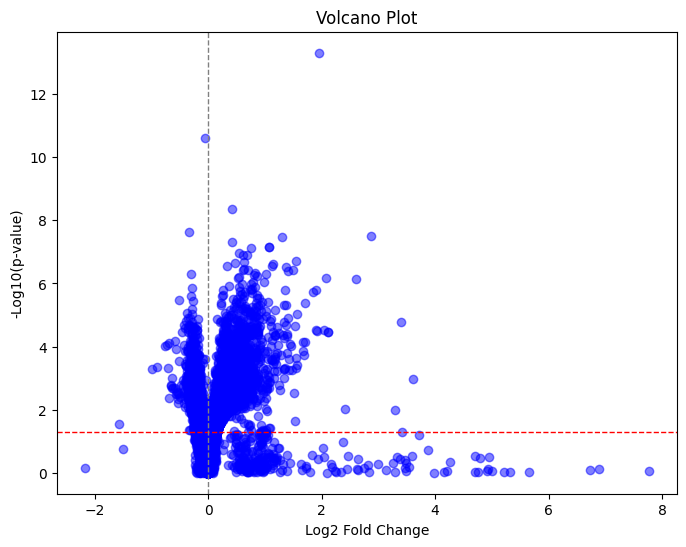

In [127]:
# Volcano plot
plt.figure(figsize=(8, 6))
plt.scatter(sorted_df['log2FoldChange'], -np.log10(sorted_df['pvalue']), color='blue', alpha=0.5)
plt.xlabel('Log2 Fold Change')
plt.ylabel('-Log10(p-value)')
plt.title('Volcano Plot')
plt.axhline(-np.log10(0.05), color='red', linestyle='--', linewidth=1)  # significance threshold
plt.axvline(0, color='gray', linestyle='--', linewidth=1)  # no fold change
plt.show()

6 step

In [190]:
elastic_df = annotations.get_annotations()[annotations.get_annotations()["sample group"] != "Other Neurological Disorders"]
elastic_df = elastic_df.merge(samples.get_samples(), left_index=True, right_index=True)
elastic_df 

,cns subregion,sample group,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
GSM3533230,Frontal Cortex,ALS Spectrum MND,42,149,0,3327,101,78,4,0,...,986,2218,2096,1120,84,556,134,570,2045,2446
GSM3533231,Frontal Cortex,ALS Spectrum MND,25,107,2,1787,153,109,2,1,...,1216,2373,2001,1144,118,582,153,552,2057,2279
GSM3533232,Frontal Cortex,ALS Spectrum MND,20,95,0,1830,121,127,1,1,...,905,2018,1815,1011,84,571,126,479,1659,1778
GSM3533233,Frontal Cortex,ALS Spectrum MND,22,101,0,2131,142,143,5,1,...,935,2278,2032,1198,97,562,132,540,2032,2135
GSM3533234,Frontal Cortex,ALS Spectrum MND,22,102,0,1706,83,178,1,3,...,966,2295,1993,1152,96,582,124,539,1742,1939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSM3533401,Frontal Cortex,ALS Spectrum MND,23,113,0,2130,72,71,2,3,...,553,1243,1089,658,72,320,73,311,1102,1169
GSM3533402,Frontal Cortex,ALS Spectrum MND,134,300,0,6077,171,42,8,5,...,719,1988,1691,966,119,460,109,399,1619,1724
GSM3533403,Frontal Cortex,ALS Spectrum MND,64,290,0,4752,118,174,8,2,...,623,1466,1246,726,61,358,107,347,1284,1469
GSM3533404,Frontal Cortex,ALS Spectrum MND,124,332,0,3516,141,173,3,2,...,743,1846,1680,936,110,479,120,503,1646,1839


In [191]:
from sklearn.discriminant_analysis import StandardScaler

sample_group = elastic_df['sample group']
elastic_df.drop(columns=['sample group', 'cns subregion'], inplace=True)
scaler = StandardScaler()
normalized = pd.DataFrame(scaler.fit_transform(elastic_df), columns=elastic_df.columns)

In [192]:
normalized

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X6B_LINE:CR1:LINE,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA
0,0.197168,0.592234,-0.261686,0.636852,-0.037928,-0.852487,0.558088,-1.056732,0.556794,-0.641223,...,0.763176,0.896824,1.036541,0.903570,-0.229917,0.712706,0.687299,1.209981,1.022973,1.409615
1,-0.625561,-0.257526,2.661982,-0.548825,1.427707,-0.296127,-0.263823,-0.649135,-0.594354,-0.641223,...,1.754874,1.213457,0.818532,1.003150,1.004375,0.912342,1.257209,1.065290,1.048585,1.072780
2,-0.867540,-0.500314,-0.261686,-0.515718,0.525778,0.026921,-0.674779,-0.649135,-0.978070,-0.641223,...,0.413926,0.488265,0.391694,0.451311,-0.229917,0.827880,0.447337,0.478485,0.199114,0.062277
3,-0.770748,-0.378920,-0.261686,-0.283972,1.117669,0.314074,0.969044,-0.649135,-0.292863,-0.641223,...,0.543278,1.019392,0.889672,1.227205,0.242018,0.758776,0.627308,0.968829,0.995227,0.782336
4,-0.770748,-0.358688,-0.261686,-0.611188,-0.545264,0.942222,-0.674779,0.166058,-0.429904,-0.641223,...,0.676941,1.054119,0.800174,1.036343,0.205715,0.912342,0.387346,0.960790,0.376265,0.387010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.722352,-0.136131,-0.261686,-0.284742,-0.855302,-0.978116,-0.263823,0.166058,-0.703987,-0.641223,...,-1.103803,-1.094899,-1.274354,-1.013344,-0.665550,-1.099370,-1.142412,-0.871971,-0.989720,-1.166059
158,4.649582,3.647324,-0.261686,2.754132,1.935043,-1.498582,2.201911,0.981251,4.887303,-0.641223,...,-0.388056,0.426982,0.107135,0.264599,1.040678,-0.024409,-0.062583,-0.164589,0.113740,-0.046639
159,1.261876,3.445000,-0.261686,1.733988,0.441222,0.870434,2.201911,-0.241539,2.420557,-0.641223,...,-0.801982,-0.639356,-0.914065,-0.731201,-1.064880,-0.807595,-0.122573,-0.582587,-0.601268,-0.560967
160,4.165624,4.294760,-0.261686,0.782367,1.089484,0.852487,0.147132,-0.241539,3.982830,-0.641223,...,-0.284574,0.136905,0.081891,0.140124,0.713953,0.121478,0.267365,0.671407,0.171367,0.185312


In [247]:
sample_group

GSM3533230    ALS Spectrum MND
GSM3533231    ALS Spectrum MND
GSM3533232    ALS Spectrum MND
GSM3533233    ALS Spectrum MND
GSM3533234    ALS Spectrum MND
                    ...       
GSM3533401    ALS Spectrum MND
GSM3533402    ALS Spectrum MND
GSM3533403    ALS Spectrum MND
GSM3533404    ALS Spectrum MND
GSM3533405    ALS Spectrum MND
Name: sample group, Length: 162, dtype: object

In [195]:
sample_group
sample_group_series = sample_group.reset_index(drop=True)
sample_group_series

0      ALS Spectrum MND
1      ALS Spectrum MND
2      ALS Spectrum MND
3      ALS Spectrum MND
4      ALS Spectrum MND
             ...       
157    ALS Spectrum MND
158    ALS Spectrum MND
159    ALS Spectrum MND
160    ALS Spectrum MND
161    ALS Spectrum MND
Name: sample group, Length: 162, dtype: object

In [196]:
combined_df = pd.concat([normalized, sample_group_series], axis=1)


In [197]:
combined_df

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,X7A_LINE:CR1:LINE,X7B_LINE:CR1:LINE,X7C_LINE:CR1:LINE,X7D_LINE:CR1:LINE,X8_LINE:CR1:LINE,X9_LINE:L1:LINE,Zaphod2:hAT-Tip100:DNA,Zaphod3:hAT-Tip100:DNA,Zaphod:hAT-Tip100:DNA,sample group
0,0.197168,0.592234,-0.261686,0.636852,-0.037928,-0.852487,0.558088,-1.056732,0.556794,-0.641223,...,0.896824,1.036541,0.903570,-0.229917,0.712706,0.687299,1.209981,1.022973,1.409615,ALS Spectrum MND
1,-0.625561,-0.257526,2.661982,-0.548825,1.427707,-0.296127,-0.263823,-0.649135,-0.594354,-0.641223,...,1.213457,0.818532,1.003150,1.004375,0.912342,1.257209,1.065290,1.048585,1.072780,ALS Spectrum MND
2,-0.867540,-0.500314,-0.261686,-0.515718,0.525778,0.026921,-0.674779,-0.649135,-0.978070,-0.641223,...,0.488265,0.391694,0.451311,-0.229917,0.827880,0.447337,0.478485,0.199114,0.062277,ALS Spectrum MND
3,-0.770748,-0.378920,-0.261686,-0.283972,1.117669,0.314074,0.969044,-0.649135,-0.292863,-0.641223,...,1.019392,0.889672,1.227205,0.242018,0.758776,0.627308,0.968829,0.995227,0.782336,ALS Spectrum MND
4,-0.770748,-0.358688,-0.261686,-0.611188,-0.545264,0.942222,-0.674779,0.166058,-0.429904,-0.641223,...,1.054119,0.800174,1.036343,0.205715,0.912342,0.387346,0.960790,0.376265,0.387010,ALS Spectrum MND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,-0.722352,-0.136131,-0.261686,-0.284742,-0.855302,-0.978116,-0.263823,0.166058,-0.703987,-0.641223,...,-1.094899,-1.274354,-1.013344,-0.665550,-1.099370,-1.142412,-0.871971,-0.989720,-1.166059,ALS Spectrum MND
158,4.649582,3.647324,-0.261686,2.754132,1.935043,-1.498582,2.201911,0.981251,4.887303,-0.641223,...,0.426982,0.107135,0.264599,1.040678,-0.024409,-0.062583,-0.164589,0.113740,-0.046639,ALS Spectrum MND
159,1.261876,3.445000,-0.261686,1.733988,0.441222,0.870434,2.201911,-0.241539,2.420557,-0.641223,...,-0.639356,-0.914065,-0.731201,-1.064880,-0.807595,-0.122573,-0.582587,-0.601268,-0.560967,ALS Spectrum MND
160,4.165624,4.294760,-0.261686,0.782367,1.089484,0.852487,0.147132,-0.241539,3.982830,-0.641223,...,0.136905,0.081891,0.140124,0.713953,0.121478,0.267365,0.671407,0.171367,0.185312,ALS Spectrum MND


In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming your DataFrame containing the features (gene expression data) is named 'features_df'
# Assuming your target variable (labels) is contained in the 'sample group' column

# Extract features (X) and target variable (y)
X = combined_df.drop(columns=['sample group'])  # Features
y = combined_df['sample group']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
elasticNet = LogisticRegression(penalty='elasticnet', solver='saga', l1_ratio=0.5, C=0.5)
elasticNet.fit(X_train, y_train)

# Predict on the test set
y_pred = elasticNet.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.30303030303030304


/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


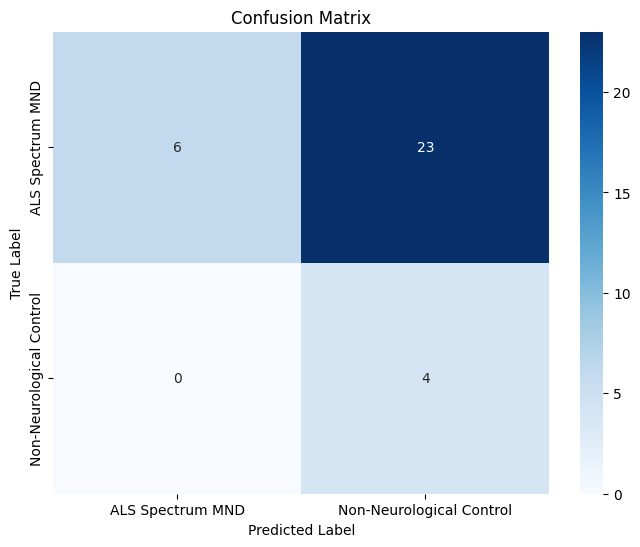

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=elasticNet.classes_, yticklabels=elasticNet.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

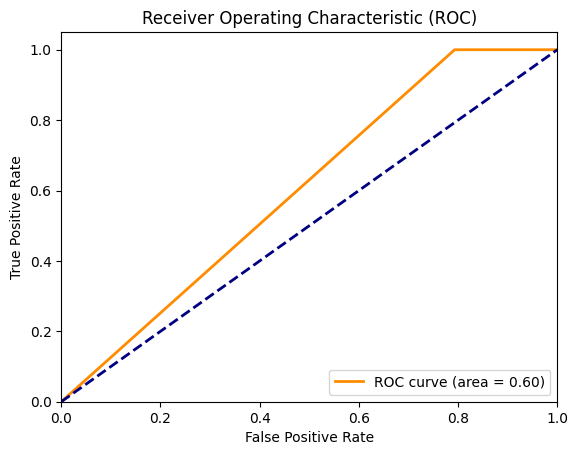

In [202]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable into binary labels
label_encoder = LabelEncoder()
y_true_binary = label_encoder.fit_transform(y_test)
y_pred_binary = label_encoder.transform(y_pred)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true_binary, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [207]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
x = combined_df.drop(columns=['sample group'])  # Features
y = combined_df['sample group']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the Logistic Regression model
elasticNet = LogisticRegressionCV(penalty='elasticnet', cv= 3, solver='saga', l1_ratios=[0.25,0.5,0.75], Cs=[0.1,0.5], scoring= 'accuracy')
elasticNet.fit(X_train, y_train)

# Predict on the test set
y_pred = elasticNet.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.w

Accuracy: 0.6363636363636364


/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [208]:
y_pred = elasticNet.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6363636363636364


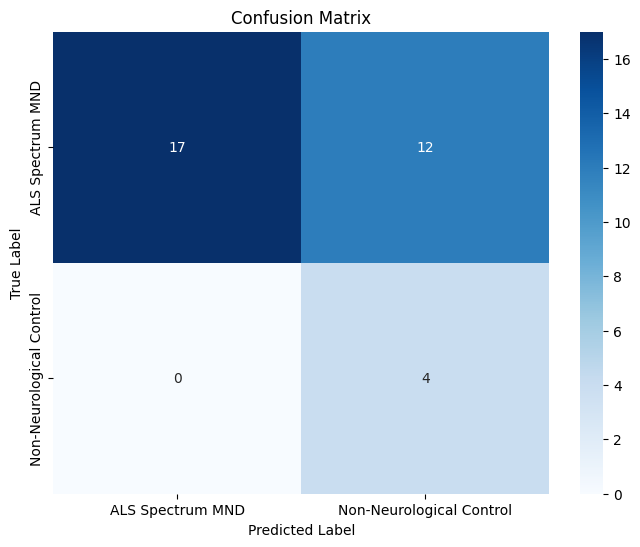

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=elasticNet.classes_, yticklabels=elasticNet.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [211]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall
recall = recall_score(y_test, y_pred, average='weighted')

# Compute F1 score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.6363636363636364
Precision: 0.9090909090909091
Recall: 0.6363636363636364
F1 Score: 0.6980237154150198


In [213]:
elasticNet.coef_


array([[0., 0., 0., ..., 0., 0., 0.]])

In [215]:
import csv

# Get the indices of the top 100 coefficients
top_100_indices = np.argsort(np.abs(elasticNet.coef_))[0][-100:]

# Create a dictionary mapping indices to coefficients
index_coef_dict = {index: coef for index, coef in zip(top_100_indices, elasticNet.coef_[0][top_100_indices])}

index_coef_dict
# # Write the dictionary to a CSV file
# with open('top_100_coefficients.csv', 'w', newline='') as csvfile:
#     writer = csv.writer(csvfile)
#     writer.writerow(['Index', 'Coefficient'])
#     for index, coef in index_coef_dict.items():
#         writer.writerow([index, coef])


{9346: 0.0026508820482450037,
 9830: 0.0026521079886601333,
 5772: 0.0026585402262169922,
 2921: 0.00265858000482906,
 10844: -0.002718785488255671,
 25468: 0.0027294223229039245,
 14934: 0.0027779680798589402,
 8059: 0.002790103267455989,
 3426: 0.002866488913056058,
 20527: 0.002885246440066285,
 22266: 0.0029202984098251985,
 4610: 0.0029454241952149916,
 19431: 0.0030452956948608884,
 10659: 0.0030605698552479744,
 21125: 0.003061734219518175,
 18664: 0.0030648135669591333,
 15443: 0.0030672672842459014,
 11470: 0.0030941380763036216,
 10729: 0.0031053523589898054,
 11009: 0.0031829373140454757,
 8914: 0.0031909021268909064,
 448: -0.003203981852642114,
 12637: 0.0032241371640108073,
 10165: 0.003266904664677001,
 4535: 0.003326595308959062,
 20224: 0.0033383078754292534,
 20225: 0.0033383078754292534,
 15272: 0.0033394773873571993,
 23823: 0.0033467310130644327,
 23825: 0.0033467310130644327,
 5868: 0.0033594726915806964,
 18849: 0.003413534940150667,
 20140: 0.003509222930521484,

In [218]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid
param_grid = {
    'penalty': ['elasticnet', 'l2', 'l1'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'C': [0.1, 0.5, 1.0],
    'max_iter': [100, 200, 300]
}

# Create the GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/Users/alexeybrown/anaconda3/envs/bio/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1175: UserWarning: l1_ratio parameter is

Best Hyperparameters: {'C': 1.0, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Accuracy: 0.9090909090909091


In [234]:
grid_results = grid_search.cv_results_

# Extract parameter combinations and their scores
params = grid_results['params']
mean_scores = grid_results['mean_test_score']

# Print parameter combinations and their corresponding scores
for param, score in zip(params, mean_scores):
    print("Parameters:", param)
    print("Mean Score:", score)

Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'newton-cg'}
Mean Score: nan
Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'lbfgs'}
Mean Score: nan
Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'liblinear'}
Mean Score: nan
Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'sag'}
Mean Score: nan
Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
Mean Score: 0.3255813953488372
Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
Mean Score: 0.8992248062015503
Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Mean Score: 0.8992248062015503
Parameters: {'C': 0.1, 'l1_ratio': 0.25, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Mean Score: 0.3023255813953488
Paramet

In [235]:
from sklearn.metrics import classification_report

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

        ALS Spectrum MND       0.91      1.00      0.95        29
Non-Neurological Control       1.00      0.25      0.40         4

                accuracy                           0.91        33
               macro avg       0.95      0.62      0.68        33
            weighted avg       0.92      0.91      0.88        33



In [246]:
coef_shape = best_model.coef_.shape
coef_shape[1]

28953

In [250]:
feature_names = X_train.columns  # Assuming X_train is your training feature DataFrame

# Create a DataFrame to store coefficients and their corresponding feature names or indexes
coef_df = pd.DataFrame({'Gene': feature_names, 'Coefficient': best_model.coef_[0]})

# Display the DataFrame
print(coef_df)
coef_df.to_csv("gene_coefficients.csv")

                         Gene  Coefficient
0                        A1BG     0.000078
1                    A1BG-AS1    -0.000756
2                        A1CF    -0.001815
3                         A2M     0.000578
4                     A2M-AS1    -0.003934
...                       ...          ...
28948        X8_LINE:CR1:LINE     0.000412
28949         X9_LINE:L1:LINE    -0.000038
28950  Zaphod2:hAT-Tip100:DNA    -0.001401
28951  Zaphod3:hAT-Tip100:DNA     0.000054
28952   Zaphod:hAT-Tip100:DNA     0.000618

[28953 rows x 2 columns]


In [257]:
coef_df_sorted = coef_df.reindex(coef_df['Coefficient'].sort_values(key=abs, ascending=False).index)

# Select the top 100 coefficients
top_100_coef = coef_df_sorted.head(100)


In [261]:
top_100_coef

,Gene,Coefficient
15308,MIR4284,0.024580
15443,MIR4484,0.020950
24401,SYCN,0.019257
12239,LOC100506358,0.018356
18330,OR4D1,0.018082
...,...,...
13434,LOC339975,0.011207
25498,TNFSF11,0.011198
21003,RERGL,0.011162
18148,OR10D3,0.011158


In [262]:
coef_df_sorted = coef_df.sort_values(by='Coefficient')

# Select the top negative coefficients
top_negative = coef_df_sorted.head(10)

# Display the top negative coefficients
print(top_negative)

            Gene  Coefficient
2194    C1orf189    -0.012577
785       ANKRD2    -0.010897
18192     OR13C4    -0.010575
16250    MIR6813    -0.010519
2699      CAVIN2    -0.010108
3083       CD79B    -0.010091
14962    MIR3121    -0.009588
10773  LINC01121    -0.009508
241    ACTN1-AS1    -0.009500
11175  LINC01655    -0.009471


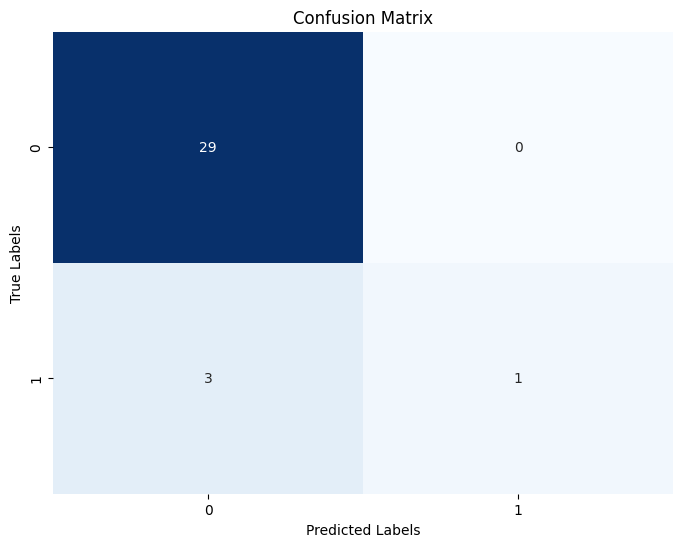

In [236]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

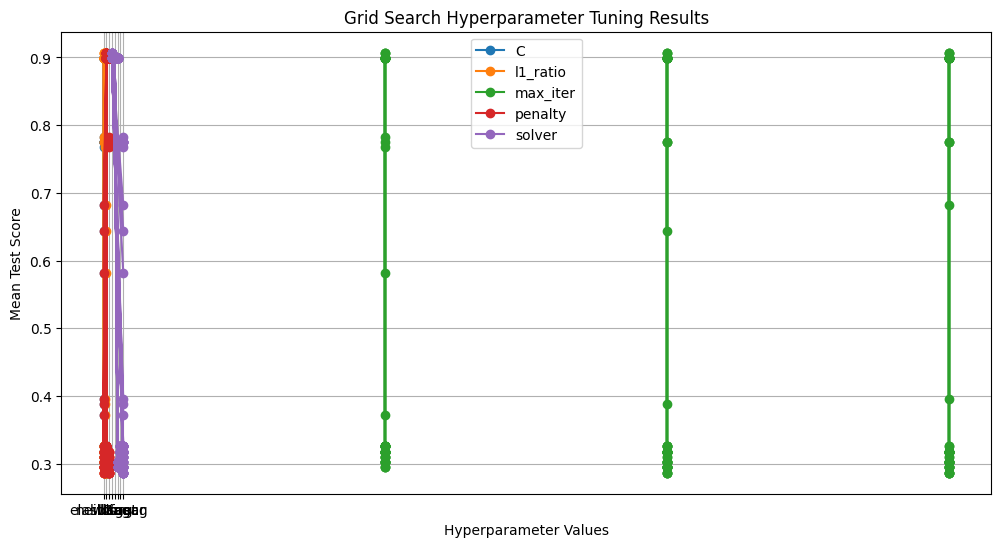

In [237]:
import numpy as np
import matplotlib.pyplot as plt

# Extract parameter combinations and their scores
params = grid_results['params']
mean_scores = grid_results['mean_test_score']

# Extract hyperparameters and their respective values
hyperparameters = list(params[0].keys())
hyperparams_values = {param: [combination[param] for combination in params] for param in hyperparameters}

# Plot the performance for each hyperparameter combination
plt.figure(figsize=(12, 6))

for param, values in hyperparams_values.items():
    plt.plot(values, mean_scores, marker='o', label=param)

plt.xlabel('Hyperparameter Values')
plt.ylabel('Mean Test Score')
plt.title('Grid Search Hyperparameter Tuning Results')
plt.legend()
plt.grid(True)
plt.show()
